In [29]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
census_dataset = pd.read_csv('../datasets/2011-census-microdata/2011-census-microdata-small.csv')  #CTGAN currently running on -tiny.csv

In [31]:
# Synthetic Datasets
privbayes = pd.read_csv('../synth-output/2011-census-test-1-privbayes/synthetic_data_1.csv')
CTGAN = pd.read_csv('../synth-output/2011-census-test-2-CTGAN/synthetic_data_2.csv')
synthpop_sampled = pd.read_csv('../synth-output/2011-census-test-3-synthpop/synthetic_data_3.csv')
synthpop_cart = pd.read_csv('../synth-output/2011-census-test-5-synthpop-cart/synthetic_data_4.csv')
# sgf = pd.read_csv('../synth-output/2011-census-test-4-sgf/synthetic_data_5.csv')

In [32]:
interesting_columns = [i for i in list(census_dataset.columns) if i != 'Person ID' and i != 'Residence Type']

# Synthetic data comparison

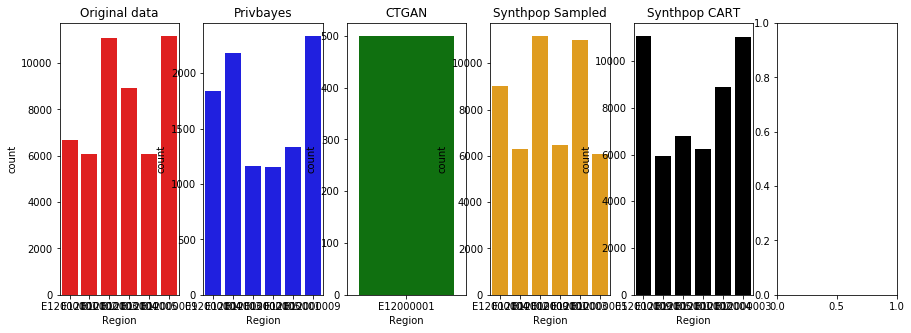

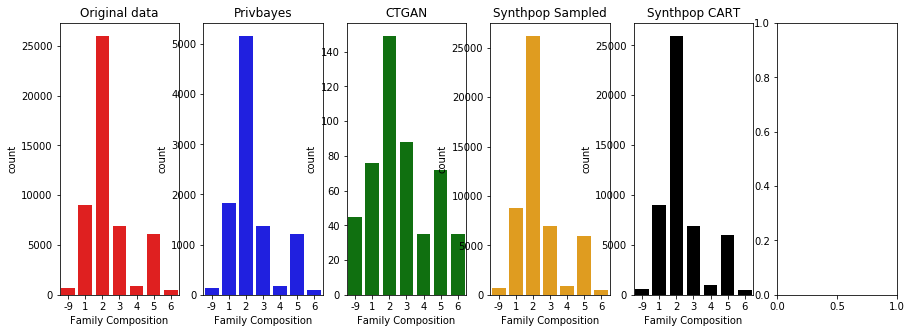

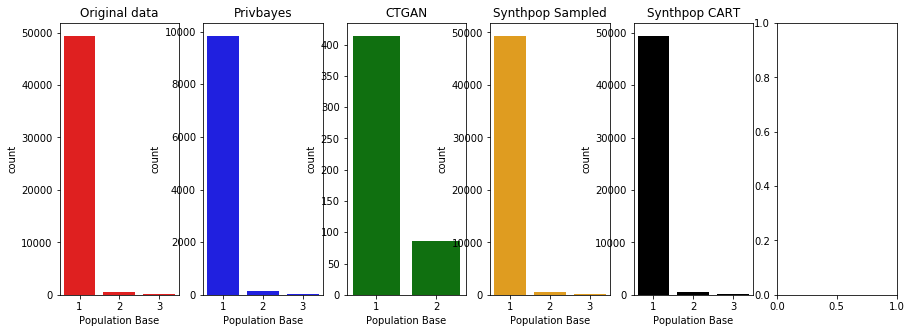

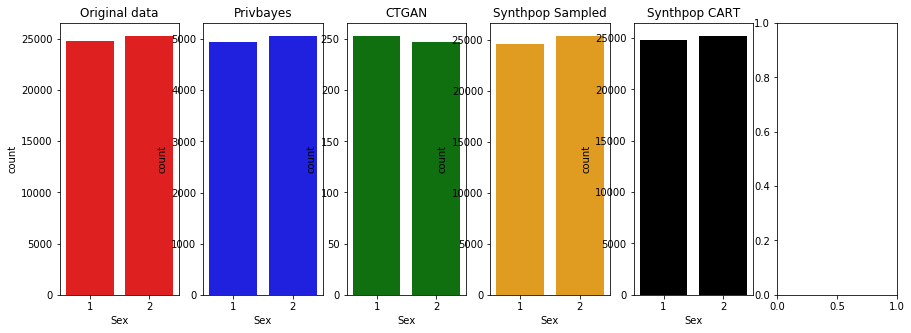

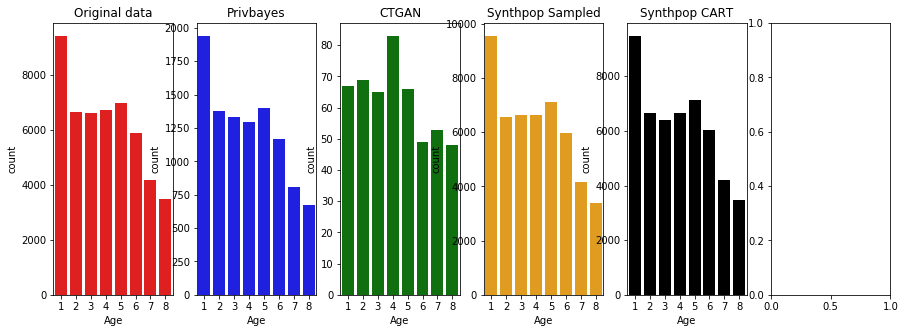

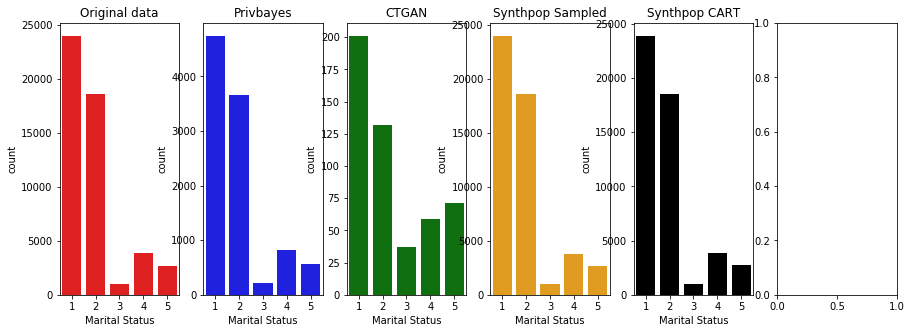

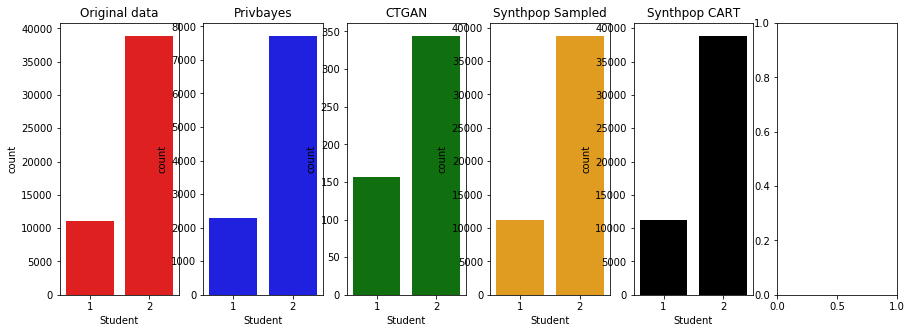

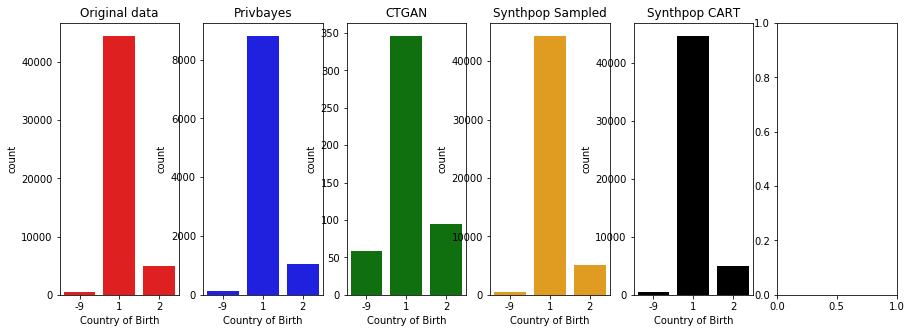

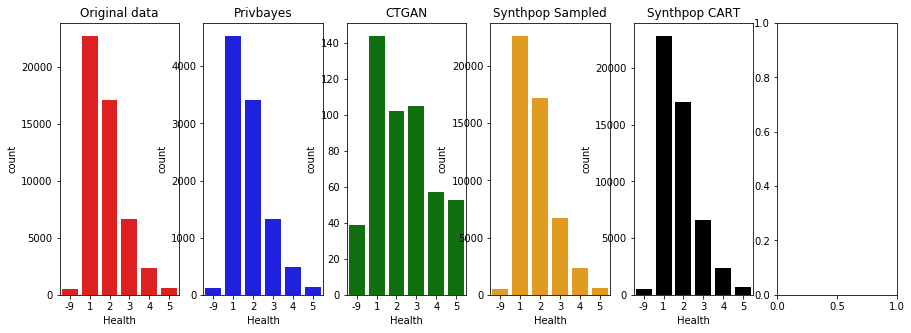

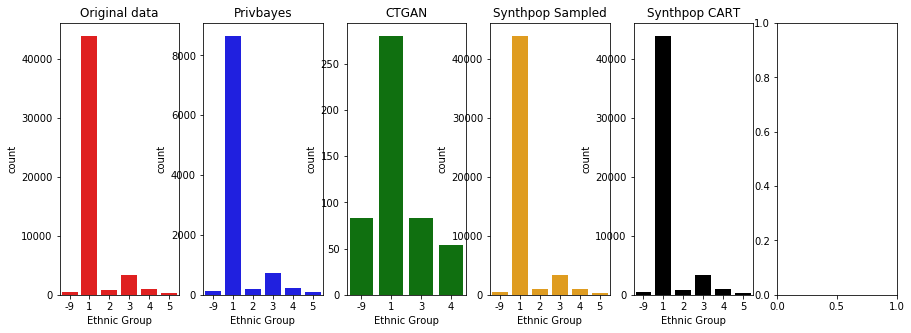

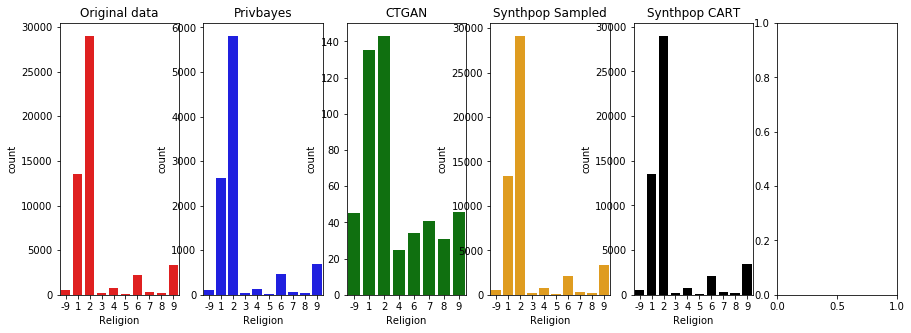

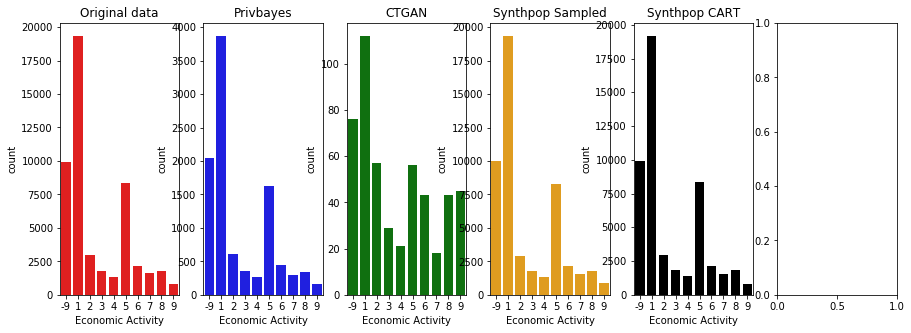

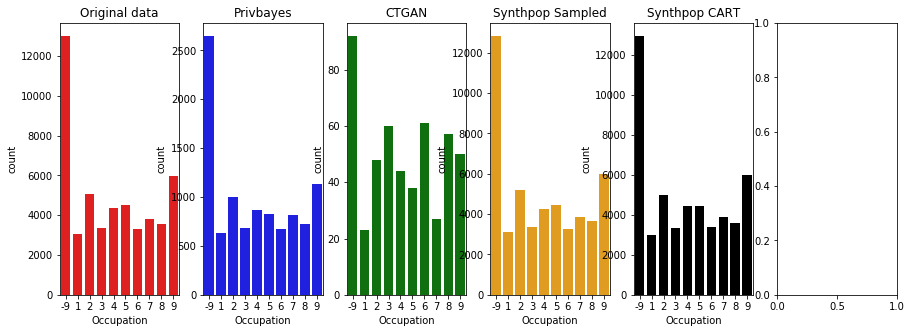

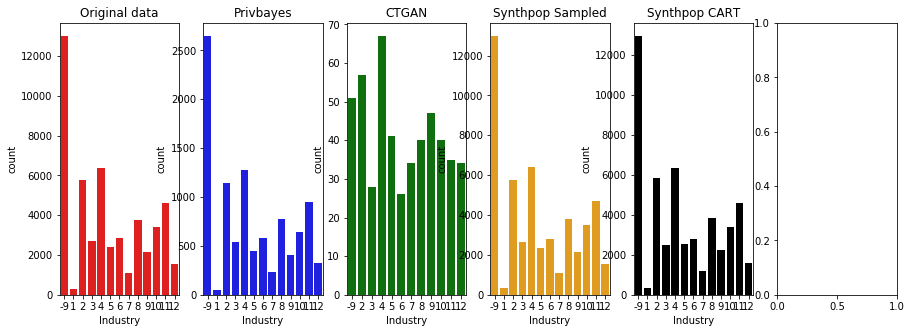

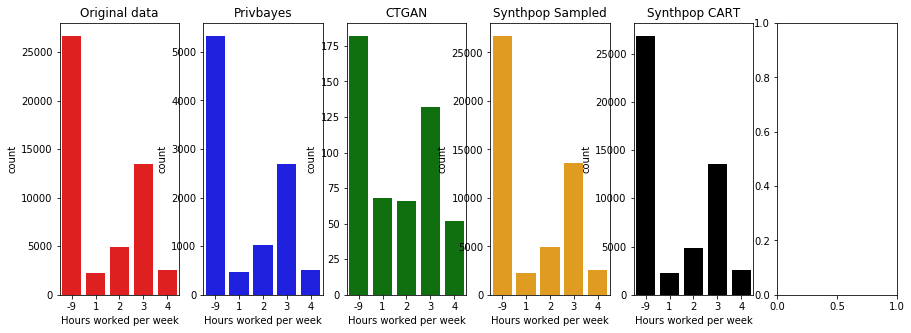

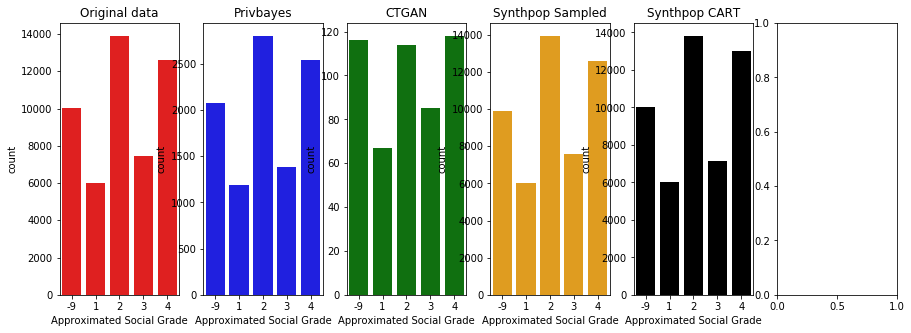

In [33]:
for col in interesting_columns: # normalise y axis if possible
    fig, ax = plt.subplots(1,6, sharey=False)
    sns.countplot(data=census_dataset, x=col, color='red', ax=ax[0])
    ax[0].set_title("Original data")
    sns.countplot(data=privbayes, x=col, color='blue', ax=ax[1])
    ax[1].set_title("Privbayes")
    sns.countplot(data=CTGAN, x=col, color='green', ax=ax[2])
    ax[2].set_title("CTGAN")
    sns.countplot(data=synthpop_sampled, x=col, color='orange', ax=ax[3]) 
    ax[3].set_title("Synthpop Sampled")
    sns.countplot(data=synthpop_cart, x=col, color='black', ax=ax[4])
    ax[4].set_title("Synthpop CART")
#     sns.countplot(data=sgf, x=col, color='brown', ax=ax[5])
#     ax[5].set_title("SGF")
    fig.set_size_inches(15, 5)

# Disclosure risk comparison

```
"privacy_parameters_disclosure_risk":
    {
        "enabled": true,
        "num_samples_intruder": 20,
        "vars_intruder": ["Sex", "Age", "Marital Status"]
    }
```

In [34]:
risks = {}
with open('../synth-output/2011-census-test-1-privbayes/disclosure_risk.json') as jsonFile:
    risks['Privbayes'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/disclosure_risk.json') as jsonFile:
    risks['CTGAN'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/disclosure_risk.json') as jsonFile:
    risks['Synthpop Sampled'] = json.load(jsonFile)
    jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/disclosure_risk.json') as jsonFile:
#     risks['SGF'] = json.load(jsonFile)
#     jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-7-synthpop-cart-vars-seq-jumbled/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART jumbled'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-8-synthpop-cart-vars-seq-optimised/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART optimised'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-9-synthpop-cart-vars-seq-test5reversed/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART reversed'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-10-synthpop-cart-proper/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART proper'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-11-synthpop-cart-smoothing/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART smoothing'] = json.load(jsonFile)
    jsonFile.close()

TODO:
- Add a positive score, one with some rows identical (leaked)
- Maybe a couple, one partial leak
- Use Jade

In [35]:
pd.DataFrame.from_dict(risks).T

,EMRi,TMRi,TMRa,EMRi_norm,TMRi_norm
Privbayes,0.0,0.0,NaN,0.00,0.00
CTGAN,1.0,1.0,0.090909,0.05,0.05
Synthpop Sampled,0.0,0.0,0.000000,0.00,0.00
Synthpop CART,0.0,0.0,0.000000,0.00,0.00
Synthpop CART jumbled,0.0,0.0,0.000000,0.00,0.00
Synthpop CART optimised,0.0,0.0,0.000000,0.00,0.00
Synthpop CART reversed,0.0,0.0,0.000000,0.00,0.00
Synthpop CART proper,0.0,0.0,0.000000,0.00,0.00
Synthpop CART smoothing,0.0,0.0,0.000000,0.00,0.00


# Utility comparison

```
"utility_parameters_classifiers":
{
    "enabled": true,
    "input_columns": ["Age"],
    "label_column": "Marital Status",
    "test_train_ratio": 0.3,
    "num_leaked_rows": 0,
    "classifier": {
        "LogisticRegression":  {"mode": "main",
                                "params_main": {"max_iter": 1000}
                               }
    }
}
```

In [36]:
def reformat(utility_dict):
    """Convert utility dict to a format easier to visualise in a dataframe"""
    output = {}
    output['Accuracy'] = utility_dict['accuracy']['value']
    output['Precision (Macro)'] = utility_dict['precision']['macro']
    output['Precision (Weighted)'] = utility_dict['precision']['weighted']
    output['Recall (Macro)'] = utility_dict['recall']['macro']
    output['Recall (Weighted)'] = utility_dict['recall']['weighted']
    output['F1 (Macro)'] = utility_dict['f1']['macro']
    output['F1 (Weighted)'] = utility_dict['f1']['weighted']
    return output
    

### Logistic Regression

In [37]:
method = 'LogisticRegression'
log_reg_utility = {}

with open('../synth-output/2011-census-test-1-privbayes/utility_o_o.json') as jsonFile:
    log_reg_utility['Privbayes O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-1-privbayes/utility_r_o.json') as jsonFile:
    log_reg_utility['Privbayes R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/utility_o_o.json') as jsonFile:
    log_reg_utility['CTGAN O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/utility_r_o.json') as jsonFile:
    log_reg_utility['CTGAN R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop Sampled O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop Sampled R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/utility_o_o.json') as jsonFile:
#     log_reg_utility['SGF O-O'] = reformat(json.load(jsonFile)[method])
#     jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/utility_r_o.json') as jsonFile:
#     log_reg_utility['SGF R-O'] = reformat(json.load(jsonFile)[method])
#     jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
    
with open('../synth-output/2011-census-test-7-synthpop-cart-vars-seq-jumbled/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART jumbled O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-7-synthpop-cart-vars-seq-jumbled/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART jumbled R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8-synthpop-cart-vars-seq-optimised/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART optimised O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8-synthpop-cart-vars-seq-optimised/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART optimised R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
    
with open('../synth-output/2011-census-test-9-synthpop-cart-vars-seq-test5reversed/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART reversed O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-9-synthpop-cart-vars-seq-test5reversed/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART reversed R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
    
with open('../synth-output/2011-census-test-10-synthpop-cart-proper/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART proper O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10-synthpop-cart-proper/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART proper R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
    
with open('../synth-output/2011-census-test-11-synthpop-cart-smoothing/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART smoothing O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-11-synthpop-cart-smoothing/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART smoothing R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()

In [38]:
pd.DataFrame.from_dict(log_reg_utility).T

,Accuracy,Precision (Macro),Precision (Weighted),Recall (Macro),Recall (Weighted),F1 (Macro),F1 (Weighted)
Privbayes O-O,72.753333,34.195797,85.660198,89.593252,72.753333,31.371026,77.788275
Privbayes R-O,72.753333,34.195797,85.660198,89.593252,72.753333,31.371026,77.788275
CTGAN O-O,71.333333,45.665126,79.759630,79.974359,71.333333,42.268567,74.660178
CTGAN R-O,30.000000,14.822804,43.097072,71.372549,30.000000,12.456994,34.543979
Synthpop Sampled O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop Sampled R-O,47.313333,20.000000,100.000000,89.462667,47.313333,12.846993,64.234964
Synthpop CART O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART R-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART jumbled O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART jumbled R-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693


Ed Analysis:
On the task of making sure that the marital status categories have similar age distributions between the real and synthetic dataset (indicating a "good" synthetic dataset), we see that the similar/identical R-O and O-O values for accuracy/precision/recall indicate good synthetic data across the methods. With the synthpop variations, changing anything other than the actual method used for each column (e.g. CART or sampled) has little/no effect. So the way to generate a synthetic dataset that is intentionally "worse" from the persective of this utility metric is to use the "sample" method.

Oliver comment:
whatever method for the classification we use, the model it produces can’t be too sophisticated, since it only has one input variable and assuming the synthesis method does a reasonable job modelling the distribution of (age, marital status), the synthetic data should work well for this question, but sampling won’t reproduce the joint (age, marital status) at all - only the marginals.

Several utility classifiers, additional input variables - keep adding them, see if it increases the discrimination betweeen methods

### Two new utility classifiers, same as the previous, except for additional input columns:

#### a
```
"input_columns": ["Age", "Ethnic Group", "Religion"],
"label_column": "Marital Status",
```
#### b
```
"input_columns": ["Age", "Ethnic Group", "Religion", "Student", "Sex"],
"label_column": "Marital Status",
```

In [42]:
method = 'LogisticRegression'
utility = {}

with open('../synth-output/2011-census-test-3-synthpop/utility_o_o.json') as jsonFile:
    utility['Synthpop Sampled 1 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/utility_r_o.json') as jsonFile:
    utility['Synthpop Sampled 1 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_o_o.json') as jsonFile:
    utility['Synthpop CART 1 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_r_o.json') as jsonFile:
    utility['Synthpop CART 1 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8-synthpop-cart-vars-seq-optimised/utility_o_o.json') as jsonFile:
    utility['Synthpop CART optimised 1 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8-synthpop-cart-vars-seq-optimised/utility_r_o.json') as jsonFile:
    utility['Synthpop CART optimised 1 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10-synthpop-cart-proper/utility_o_o.json') as jsonFile:
    utility['Synthpop CART proper 1 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10-synthpop-cart-proper/utility_r_o.json') as jsonFile:
    utility['Synthpop CART proper 1 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
    

with open('../synth-output/2011-census-test-3a-synthpop/utility_o_o.json') as jsonFile:
    utility['Synthpop Sampled 3 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3a-synthpop/utility_r_o.json') as jsonFile:
    utility['Synthpop Sampled 3 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5a-synthpop-cart/utility_o_o.json') as jsonFile:
    utility['Synthpop CART 3 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5a-synthpop-cart/utility_r_o.json') as jsonFile:
    utility['Synthpop CART 3 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8a-synthpop-cart-vars-seq-optimised/utility_o_o.json') as jsonFile:
    utility['Synthpop CART optimised 3 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8a-synthpop-cart-vars-seq-optimised/utility_r_o.json') as jsonFile:
    utility['Synthpop CART optimised 3 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10a-synthpop-cart-proper/utility_o_o.json') as jsonFile:
    utility['Synthpop CART proper 3 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10a-synthpop-cart-proper/utility_r_o.json') as jsonFile:
    utility['Synthpop CART proper 3 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()

with open('../synth-output/2011-census-test-3b-synthpop/utility_o_o.json') as jsonFile:
    utility['Synthpop Sampled 5 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3b-synthpop/utility_r_o.json') as jsonFile:
    utility['Synthpop Sampled 5 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5b-synthpop-cart/utility_o_o.json') as jsonFile:
    utility['Synthpop CART 5 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5b-synthpop-cart/utility_r_o.json') as jsonFile:
    utility['Synthpop CART 5 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8b-synthpop-cart-vars-seq-optimised/utility_o_o.json') as jsonFile:
    utility['Synthpop CART optimised 5 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-8b-synthpop-cart-vars-seq-optimised/utility_r_o.json') as jsonFile:
    utility['Synthpop CART optimised 5 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10b-synthpop-cart-proper/utility_o_o.json') as jsonFile:
    utility['Synthpop CART proper 5 input O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-10b-synthpop-cart-proper/utility_r_o.json') as jsonFile:
    utility['Synthpop CART proper 5 input R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()

In [44]:
synthpop_utility = pd.DataFrame.from_dict(utility).T
synthpop_utility

,Accuracy,Precision (Macro),Precision (Weighted),Recall (Macro),Recall (Weighted),F1 (Macro),F1 (Weighted)
Synthpop Sampled 1 input O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop Sampled 1 input R-O,47.313333,20.000000,100.000000,89.462667,47.313333,12.846993,64.234964
Synthpop CART 1 input O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART 1 input R-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART optimised 1 input O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART optimised 1 input R-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART proper 1 input O-O,72.166667,34.143065,85.561952,89.435355,72.166667,31.248068,77.380693
Synthpop CART proper 1 input R-O,72.173333,44.009613,79.556632,78.703640,72.173333,40.951697,75.256409
Synthpop Sampled 3 input O-O,72.930501,44.165619,80.057514,79.415263,72.930501,41.364306,75.744868
Synthpop Sampled 3 input R-O,47.350561,20.000000,100.000000,89.470112,47.350561,12.853853,64.269265


So I’ve run a few of the parameter variations of synthpop (“optimised” = changed the vars_sequence, “proper” = the proper parameter is set to true), with varying numbers of input columns to the utility classifier. 1 input is `[“Age’]`, 3 is  `[“Age”, “Ethnic Group”, “Religion”]` and 5 is `[“Age”, “Ethnic Group”, “Religion”, “Student”, “Sex”]`. The larger the number of input columns the lower the recall and the higher the precision, f1 and accuracy go. Looks like there’s still little to distinguish between the parameter variations (synthetic datasets) for the same utility classifier, even at 5 input columns, unless you very selectively zoom in on “Recall (Macro)“, where the “optimised” one appears to have a higher recall

In [56]:
synthpop_utility.loc[
    ['Synthpop Sampled 1 input R-O',
     'Synthpop CART 1 input R-O',
     'Synthpop Sampled 3 input R-O',
     'Synthpop CART 3 input R-O',
     'Synthpop Sampled 5 input R-O',
     'Synthpop CART 5 input R-O'],
    ['F1 (Macro)', 'F1 (Weighted)']]

,F1 (Macro),F1 (Weighted)
Synthpop Sampled 1 input R-O,12.846993,64.234964
Synthpop CART 1 input R-O,31.248068,77.380693
Synthpop Sampled 3 input R-O,12.853853,64.269265
Synthpop CART 3 input R-O,34.346755,77.144415
Synthpop Sampled 5 input R-O,12.853853,64.269265
Synthpop CART 5 input R-O,41.530853,77.265907


Conclusion then of this investigation is that if we take F1 (and especially F1 weighted) as perhaps the most rigorous utility score, then increasing numbers of input columns to the utility classifier doesn’t really increase the discrimination between “good” and “bad” methods of synthetic data creation. Nonetheless, we can unsurprisingly get a better utility synthetic dataset from synthpop by using CART, compared to just sampling.